# Visualization Descriptive Statistics

Of the 4 involved data sets a collection of statistics is created to gain a first insight.
For this, we extract named entities, words and characters from the queries. Accordingly, 4 subcategories arise:
- queries
- named entities
- words
- characters 

For each category, the length is measured in terms of all sublevels. E.g. the length of a named entity can be described as the number of words or the number of characters. Alongside, the items of each subcategory are sorted with respect to their frequency to check for specific liguistic laws like zipfs's law. Essentially, we obtain a thorough set of statistics.

### 1. Zipf's law 
Zipf's law states that frequencies of words from a document follow an inversely proportional distribution to their rank when sorted in descending order. To get a more comprehensive comparison between the data sets, we check on zipf's law for all subcategories.
 

To get started, lets define some configuration for our visualization:

In [1]:
from thesis_schneg.model import DatasetName

##### set visualization configuration #####

# combine all plots in one figure or plot each analysis in a single figure
single_plot = True
# single_plot = False

# save visualization or not
save_vis: bool = False
# save_vis: bool = True

# select dataset (if none is selected all datasets are visualized in a joint plot) 
dataset: DatasetName = None 
# dataset: DatasetName = 'aol'
# dataset: DatasetName = 'aql'
# dataset: DatasetName = 'ms-marco'
# dataset: DatasetName = 'orcas'

analyses = []
# set analysis that should be visualized
analyses.append('query-frequencies')
# analyses.append('extract-named-entities')
# analyses.append('extract-words')
# analyses.append('extract-chars')

# test_data = True
test_data = False

normalize_data = True
# normalize_data = False

Load the specified data:

In [2]:
from thesis_schneg.vis_modules import _get_results_paths, load_results
import time
color = None
label = None
# load data
analysis_data = []
for analysis_name in analyses:
    if dataset is None:
        result_data = {}
        # crawl files from all datasets and load into dictionary
        if analysis_name == 'query-frequencies':
            paths = {f"{name}": _get_results_paths(name, analysis_name) for name in [
                "aol", "aql"]}
        else:
            paths = {f"{name}": _get_results_paths(name, analysis_name) for name in [
                "aol", "aql", "ms-marco", "orcas"]}
        # iterate over datasets and create visualization
        for name, result_paths in paths.items():
            start_time = time.time()
            print(f"Loading data from {name} dataset")
            vis_data = load_results(result_paths, test_data=test_data)
            result_data.update({name: vis_data})
            end_time = time.time()  
            print(f"{name} loaded in {(end_time - start_time)/60} min")
        label=["AOL", "AQL", "MS-MARCO", "ORCAS"]
        analysis_data.append(result_data)
    else:
        # load data from single dataset
        result_paths = _get_results_paths(dataset, analysis_name)
        start_time = time.time()
        print(f"Loading data from {dataset} dataset")
        result_data = {dataset: load_results(result_paths, use_arrow=True)}
        end_time = time.time()  
        print(f"{dataset} loaded in {(end_time - start_time)/60} min")
        analysis_data.append(result_data)   

Loading data from aol dataset


KeyboardInterrupt: 

Start the visualization:

In [3]:
from thesis_schneg.vis_modules import log_plot
from pathlib import Path
from matplotlib import pyplot as plt
import matplotlib
import scienceplots

analyses_params = []
for analysis_name in analyses:
    # load visualization parametes into dictionary
    if analysis_name == 'query-frequencies':
        vis_params = {"dataset-col-x": "serp_query_text_url", "dataset-col-y": "count()", "x-label": "Rank",
                      "y-label": "Frequency", "x-lim": None, "y-lim": None, "title": "Zipf's Law Queries"}
    elif analysis_name == 'extract-named-entities':
        vis_params = {"dataset-col-x": "entity", "dataset-col-y": "count()", "x-label": "Rank",
                      "y-label": "Frequency", "x-lim": None, "y-lim": None, "title": "Zipf's Law Named Entities"}
    elif analysis_name == 'extract-words':
        vis_params = {"dataset-col-x": "word", "dataset-col-y": "count()", "x-label": "Rank",
                      "y-label": "Frequency", "x-lim": None, "y-lim": None, "title": "Zipf's Law Words"}
    elif analysis_name == 'extract-chars':
        vis_params = {"dataset-col-x": "char", "dataset-col-y": "count()", "x-label": "Rank",
                      "y-label": "Frequency", "x-lim": None, "y-lim": None, "title": "Zipf's Law Characters"}
    analyses_params.append(vis_params)

# latex rendering for matplotlib
matplotlib.rcParams.update(
    {
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
    }
)

# set path to save visualization
if len(analyses) > 1:
    if single_plot:
        vis_dir = Path(
            f"/home/benjamin/studium/masterarbeit/thesis-schneg/plots/{analyses[0]}-and-{analyses[1]}-single")
    else:
        vis_dir = Path(
            f"/home/benjamin/studium/masterarbeit/thesis-schneg/plots/{analyses[0]}-and-{analyses[1]}")
else:
    if single_plot:
        vis_dir = Path(
            f"/home/benjamin/studium/masterarbeit/thesis-schneg/plots/{analyses[0]}-single")
    else:
        vis_dir = Path(
            f"/home/benjamin/studium/masterarbeit/thesis-schneg/plots/{analyses[0]}")
    
# vis_dir = Path(
#         f"/home/benjamin/studium/masterarbeit/thesis-schneg/plots/extract-named-entities")

# make directory if it does not exist
if not vis_dir.exists() and save_vis:
        vis_dir.mkdir(parents=True)

# enable pgf format for matplotlib
if save_vis:
    matplotlib.use("pgf")
# use science style for plots from scienceplots library
plt.style.use(["science", "grid"])

# create subplots for each dataset
# set size of plot
textwidth = 5.5129
aspect_ratio = 6/8
scale = 1.0
width = textwidth * scale
height = width * aspect_ratio
if single_plot:
    fig, ax = plt.subplots(ncols=len(analyses), nrows=1,
                           figsize=(width*1.03, 4*height/5))
else:
    fig, ax = plt.subplots(ncols=len(analyses), nrows=4,
                           figsize=(width, 2*height))

for i in range(len(analyses)):
    result_data = analysis_data[i]
    vis_params = analyses_params[i]
    print(f"Visualizing {analyses[i]}")
    print(vis_params)
    # create visualization for all data sets if dataset is not specified
    if dataset is None:

        multi = True
        # color palette for datasets
        color = ['tab:blue', 'tab:orange', 'tab:gray', 'tab:red']
        linestyles = ["solid", "dashdot", "dashed", "dotted"]
        # counter for datasets
        cnt_datasets = 0
        # iterate over datasets and create visualization
        for name, vis_data in result_data.items():
            if normalize_data:
                vis_data[vis_params["dataset-col-y"]] = vis_data[vis_params["dataset-col-y"]] / \
                    vis_data[vis_params["dataset-col-y"]].sum()
            # apply specific visualization function
            if not single_plot:
                if len(analyses) > 1:
                    fig, ax[cnt_datasets, i] = log_plot(data=vis_data, subplots=(fig, ax[cnt_datasets, i]),
                                                        vis_params=vis_params, label=label[cnt_datasets], linestyle=linestyles[cnt_datasets], multi=multi, color=color[cnt_datasets])
                else:
                    fig, ax[cnt_datasets] = log_plot(data=vis_data, subplots=(fig, ax[cnt_datasets]),
                                                     vis_params=vis_params, label=name.upper(), multi=multi, linestyle=linestyles[cnt_datasets], color=color[cnt_datasets])  # , color=color[cnt_datasets]
            else:
                if len(analyses) > 1:
                    fig, ax[i] = log_plot(data=vis_data, subplots=(fig, ax[i]),
                                          vis_params=vis_params, label=label[cnt_datasets], multi=multi, linestyle=linestyles[cnt_datasets], color=color[cnt_datasets])
                else:
                    fig, ax = log_plot(data=vis_data, subplots=(fig, ax),
                                       vis_params=vis_params, label=name.upper(), multi=multi, linestyle=linestyles[cnt_datasets], color=color[cnt_datasets])  # , color=color[cnt_datasets]
            cnt_datasets += 1

    # create visualization for a specific data set:
    else:
        multi = False

        # modify title
        vis_params["title"] = f'{vis_params["title"]} ({dataset.upper()})'

        # set size of plot
        textwidth = 5.5129
        aspect_ratio = 6/8
        scale = 1.0
        width = textwidth * scale
        height = width * aspect_ratio

        # create subplot for dataset
        fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(width, height))

        # apply specific visualization function
        fig, ax = log_plot(data=result_data[dataset], subplots=(fig, ax),
                           vis_params=vis_params, multi=multi)

        # make layout tight
        plt.tight_layout()

        # either save visualization or show it
        if save_vis:
            fig.savefig(vis_dir.joinpath(f"{dataset}.pgf"))
        else:
            plt.show()

if dataset is None:
    fig.supxlabel(analyses_params[0]["x-label"], y=0.05)
    fig.supylabel(analyses_params[0]["y-label"])
# make layout tight
plt.tight_layout()

# either save visualization or show it
if save_vis:
    fig.savefig(vis_dir.joinpath("all.pgf"))
else:
    plt.show()

print("Visualization finished")





Visualizing query-frequencies
[{'dataset-col-x': 'serp_query_text_url', 'dataset-col-y': 'count()', 'x-label': 'Rank', 'y-label': 'Frequency', 'x-lim': None, 'y-lim': None, 'title': "Zipf's Law Queries"}]


: 

### 2. Length Plots

We plot the lengths of queries and their previously defined subcategories. For the sake of clarity we plot the results of each data set seperately.

Visualization configurations:

In [2]:
from thesis_schneg.model import DatasetName, AnalysisName

##### set visualization configuration #####

# save visualization or not
save_vis: bool = False
# save_vis: bool = True

# select dataset (if none is selected all datasets are visualized in a joint plot) 
# dataset: DatasetName = None 
dataset: DatasetName = 'aol'
# dataset: DatasetName = 'aql'
# dataset: DatasetName = 'ms-marco'
# dataset: DatasetName = 'orcas'

struc_level = []
# struc_level.append('queries')
# struc_level.append('named-entities')
struc_level.append('words')

base_analyses = []
base_analyses.append('character-count-frequencies') #-{struc}
# base_analyses.append('word-count-frequencies')
# base_analyses.append('entity-count-frequencies')

analyses = []
for item in base_analyses:
    for struc in struc_level:
        analyses.append(f'{item}-{struc}')

# test_data = True
test_data = False

normalize_data = True
# normalize_data = False

In [22]:
analyses = []
analyses.append('character-count-frequencies-words') #-{struc}
analyses.append('entity-count-frequencies-queries') #-{struc}


In [5]:
from thesis_schneg.vis_modules import _get_results_paths, load_results
from pathlib import Path
import time
color = None
label = None
# load data
analysis_data = []
for analysis_name in analyses:
    if dataset is None:
        result_data = {}
        # crawl files from all datasets and load into dictionary
        paths = {f"{name}": _get_results_paths(name, analysis_name) for name in [
            "aol", "aql", "ms-marco", "orcas"]}
        if analysis_name == 'character-count-frequencies-words':
            base_path = Path("/mnt/ceph/storage/data-in-progress/data-teaching/theses/thesis-schneg/analysis_data/analysis/aol-words-character-count-frequencies-special")
            paths["aol"] = [path for path in base_path.iterdir(
        )]
        # iterate over datasets and create visualization
        for name, result_paths in paths.items():
            start_time = time.time()
            print(f"Loading data from {name} dataset")
            vis_data = load_results(result_paths, test_data=test_data)
            result_data.update({name: vis_data})
            end_time = time.time()  
            print(f"{name} loaded in {(end_time - start_time)/60} min")
        color = ['blue', 'orange', 'red', 'purple']
        label=["AOL", "AQL", "MS-MARCO", "ORCAS"]
        analysis_data.append(result_data)
    else:
        # load data from single dataset
        result_paths = _get_results_paths(dataset, analysis_name)
        start_time = time.time()
        print(f"Loading data from {dataset} dataset")
        result_data = {dataset: load_results(result_paths)}
        end_time = time.time()  
        print(f"{dataset} loaded in {(end_time - start_time)/60} min")
        analysis_data.append(result_data)   

Loading data from aol dataset
aol loaded in 0.15082292159398397 min


In [24]:
analyses_params = []
vis_params = {"dataset-col-x": "character-count", "dataset-col-y": "count()", "x-label": "Count",
              "y-label": "Frequency", "x-lim": None, "y-lim": None, "title": "Character per Word"}
analyses_params.append(vis_params)
vis_params = {"dataset-col-x": "entity-count", "dataset-col-y": "count()", "x-label": "Count",
              "y-label": "Frequency", "x-lim": None, "y-lim": None, "title": "Named Entity per Query"}
analyses_params.append(vis_params)


Visualizing character-count-frequencies-words
[{'dataset-col-x': 'character-count', 'dataset-col-y': 'count()', 'x-label': 'Count', 'y-label': 'Frequency', 'x-lim': [0, 10], 'y-lim': None, 'title': 'Characters per Word'}]


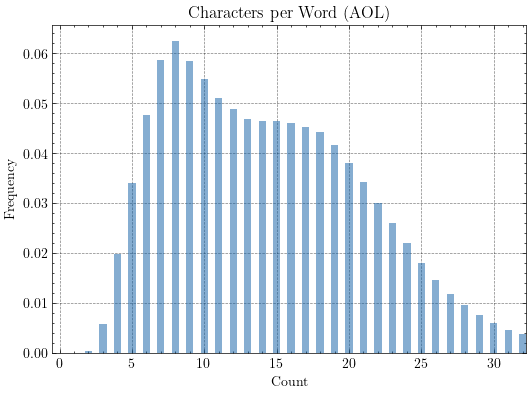

In [12]:
from thesis_schneg.vis_modules import bar_plot, get_xlim
from pathlib import Path
from matplotlib import pyplot as plt
import matplotlib
import scienceplots

analyses_params = []

for item in base_analyses:
    for struc in struc_level:
        if struc == 'queries':
            sub_title = "Query"
        elif struc == 'named-entities':
            sub_title = "Named Entity"
        elif struc == 'words':
            sub_title = "Word"

        # load visualization parametes into dictionary
        if f"{item}-{struc}" == f'character-count-frequencies-{struc}':
            vis_params = {"dataset-col-x": "character-count", "dataset-col-y": "count()", "x-label": "Count", "y-label": "Frequency", "x-lim": [0,10], "y-lim": None, "title": f"Characters per {sub_title}"}
        elif f"{item}-{struc}" == f'word-count-frequencies-{struc}':
            vis_params = {"dataset-col-x": "word-count", "dataset-col-y": "count()", "x-label": "Count", "y-label": "Frequency", "x-lim": [0,10], "y-lim": None, "title": f"Words per {sub_title}"}
        elif f"{item}-{struc}" == f'entity-count-frequencies-{struc}':
            vis_params = {"dataset-col-x": "entity-count", "dataset-col-y": "count()", "x-label": "Count", "y-label": "Frequency", "x-lim": [0,10], "y-lim": None, "title": f"Named Entities per {sub_title}"}
        analyses_params.append(vis_params)


# latex rendering for matplotlib
matplotlib.rcParams.update(
    {
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
    }
)

# set path to save visualization
if len(analyses) > 1:
    vis_dir = Path(
        f"/home/benjamin/studium/masterarbeit/thesis-schneg/plots/{analyses[0]}-and-{analyses[1]}")
else:
    vis_dir = Path(
        f"/home/benjamin/studium/masterarbeit/thesis-schneg/plots/{analyses[0]}")
    
# vis_dir = Path(
#         f"/home/benjamin/studium/masterarbeit/thesis-schneg/plots/extract-named-entities")

# make directory if it does not exist
if not vis_dir.exists() and save_vis:
        vis_dir.mkdir(parents=True)

# enable pgf format for matplotlib
if save_vis:
    matplotlib.use("pgf")
# use science style for plots from scienceplots library
plt.style.use(["science", "grid"])

# create subplots for each dataset
# set size of plot
textwidth = 5.5129
aspect_ratio = 6/8
scale = 1.0
width = textwidth * scale
height = width * aspect_ratio

bar_width = 0.5 
if dataset is None:
    fig, ax = plt.subplots(ncols=len(analyses), nrows=4, figsize=(width, 2*height))
else:
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(width, height))
for i in range(len(analyses)):   
    result_data = analysis_data[i]
    vis_params = analyses_params[i]
    print(f"Visualizing {analysis_name}")
    print(analyses_params)
    # create visualization for all data sets if dataset is not specified
    if dataset is None:

        multi = True
        # color palette for datasets
        color =  ['tab:blue', 'tab:orange', 'tab:gray', 'tab:red']

        # get xlim
        xlims = []
        for name, vis_data in result_data.items():
            xlims.append(get_xlim(vis_data, vis_params, threshold=0.054, bar_width=bar_width)[1]) #0.054
        vis_params["x-lim"] = [0-bar_width, max(xlims)]
        # counter for datasets
        cnt_datasets = 0
        # iterate over datasets and create visualization
        for name, vis_data in result_data.items():
            # normalize data
            if normalize_data:
                vis_data[vis_params["dataset-col-y"]] = vis_data[vis_params["dataset-col-y"]] / \
                    vis_data[vis_params["dataset-col-y"]].sum()
            vis_data = vis_data.sort_values(vis_params["dataset-col-x"], ascending=True)
            # apply specific visualization function
            if len(analyses) > 1:
                fig, ax[cnt_datasets,i] = bar_plot(data=vis_data, subplots=(fig, ax[cnt_datasets,i]),
                                                vis_params=vis_params, label=label[cnt_datasets], multi=multi, color=color[cnt_datasets], bar_width=bar_width)
                if cnt_datasets == 0:
                    ax[cnt_datasets,i].set_title(vis_params["title"])
            else:
                fig, ax[cnt_datasets] = bar_plot(data=vis_data, subplots=(fig, ax[cnt_datasets]),
                                                vis_params=vis_params, label=name.upper(), multi=multi, color=color[cnt_datasets], bar_width=bar_width) #, color=color[cnt_datasets]
                if cnt_datasets == 0:
                    ax[cnt_datasets].set_title(vis_params["title"])
            cnt_datasets += 1
            


    # create visualization for a specific data set:
    else: 
        multi = False 
        # get xlim
        xlims = []
        for name, vis_data in result_data.items():
            xlims.append(get_xlim(vis_data, vis_params, threshold=0.054, bar_width=bar_width)[1]) #0.054
        vis_params["x-lim"] = [0-bar_width, max(xlims)]

        if normalize_data:
            vis_data[vis_params["dataset-col-y"]] = vis_data[vis_params["dataset-col-y"]] / \
                    vis_data[vis_params["dataset-col-y"]].sum()
        
        vis_data = vis_data.sort_values(vis_params["dataset-col-x"], ascending=True)
        
        # modify title
        vis_params["title"] = f'{vis_params["title"]} ({dataset.upper()})'

        # set size of plot
        textwidth = 5.5129
        aspect_ratio = 6/8
        scale = 1.0
        width = textwidth * scale
        height = width * aspect_ratio

        # # create subplot for dataset
        # fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(width, height))

        # apply specific visualization function
        fig, ax = bar_plot(data=vis_data, subplots=(fig, ax),
                                                vis_params=vis_params, multi=multi,  bar_width=bar_width)
        
        # # make layout tight
        # plt.tight_layout()
        
        # # either save visualization or show it
        # if save_vis:
        #     fig.savefig(vis_dir.joinpath(f"{dataset}.pgf"))
        # else:
        #     plt.show()

if dataset is None:
    fig.supxlabel(analyses_params[0]["x-label"])
    fig.supylabel(analyses_params[0]["y-label"])
# make layout tight
plt.tight_layout()

# either save visualization or show it  
if save_vis:
    if dataset is not None:
        fig.savefig(vis_dir.joinpath(f"{dataset}.pgf"))
    else:
        fig.savefig(vis_dir.joinpath("all.pgf"))
else:
    plt.show()


